# EDA for KuaiRec Dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## User-item Interactions

Here's following information in the table:

| Field Name | Description | Type | Example |
|------------|-------------|------|---------|
| user_id | The ID of the user. | int64 | 0 |
| video_id | The ID of the viewed video. | int64 | 3650 |
| play_duration | Time of video viewing of this interaction (millisecond). | int64 | 13838 |
| video_duration | Time of this video (millisecond). | int64 | 10867 |
| time | Human-readable date for this interaction | str | "2020-07-05 00:08:23.438" |
| date | Date of this interaction | int64 | 20200705 |
| timestamp | Unix timestamp | float64 | 1593878903.438 |
| watch_ratio | The video watching ratio (=play_duration/video_duration) | float64 | 1.273397 |

In [2]:
# Load dataset
rootpath = "../KuaiRec 2.0/"
small_matrix = pd.read_csv(rootpath + "data/small_matrix.csv")

In [3]:
# Basic statistical summary
small_matrix.describe()

,user_id,video_id,play_duration,video_duration,date,timestamp,watch_ratio
count,4.676570e+06,4.676570e+06,4.676570e+06,4.676570e+06,4.494578e+06,4.494578e+06,4.676570e+06
mean,3.631649e+03,4.974939e+03,8.612637e+03,1.448645e+04,2.020077e+07,1.596241e+09,9.070695e-01
std,2.043873e+03,3.064622e+03,1.223661e+04,2.046711e+04,4.895180e+01,1.254444e+06,1.362324e+00
min,1.400000e+01,1.030000e+02,0.000000e+00,3.067000e+03,2.020070e+07,1.593801e+09,0.000000e+00
25%,1.834000e+03,2.369000e+03,5.811000e+03,7.523000e+03,2.020072e+07,1.595210e+09,4.675769e-01
50%,3.687000e+03,4.692000e+03,7.549000e+03,9.600000e+03,2.020080e+07,1.596224e+09,7.691666e-01
75%,5.421000e+03,7.474000e+03,9.880000e+03,1.193400e+04,2.020081e+07,1.597121e+09,1.120590e+00
max,7.162000e+03,1.059500e+04,7.988155e+06,3.150720e+05,2.020090e+07,1.599321e+09,5.715214e+02


### Missing Values

In [9]:
# Find out missing values
null_counts = small_matrix.isnull().sum()
null_counts.to_frame(name='Null Count')

,Null Count
user_id,0
video_id,0
play_duration,0
video_duration,0
time,181992
date,181992
timestamp,181992
watch_ratio,0


### Watch Ratio

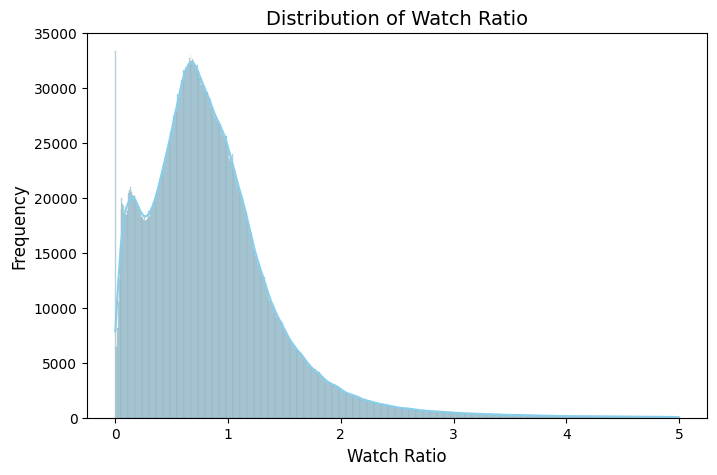

watch_ratio
< 5     4653778
>= 5      22792
Name: count, dtype: int64

Percentages:
watch_ratio
< 5     99.512634
>= 5     0.487366
Name: count, dtype: float64


In [13]:
# Filter out extreme values
watch_ratios = small_matrix[small_matrix['watch_ratio'] < 5.0]

# Distribution of watch_ratio
plt.figure(figsize=(8, 5))
sns.histplot(watch_ratios['watch_ratio'], kde=True, color='skyblue')
plt.title('Distribution of Watch Ratio', fontsize=14)
plt.xlabel('Watch Ratio', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# Print the exact counts and percentages of watch_ratio >= 5 (extreme values) and < 5 
watch_ratio_counts = small_matrix['watch_ratio'].apply(lambda x: '>= 5' if x >= 5 else '< 5').value_counts()
total = watch_ratio_counts.sum()
print(watch_ratio_counts)
print("\nPercentages:")
print(watch_ratio_counts / total * 100)

### Video Duration

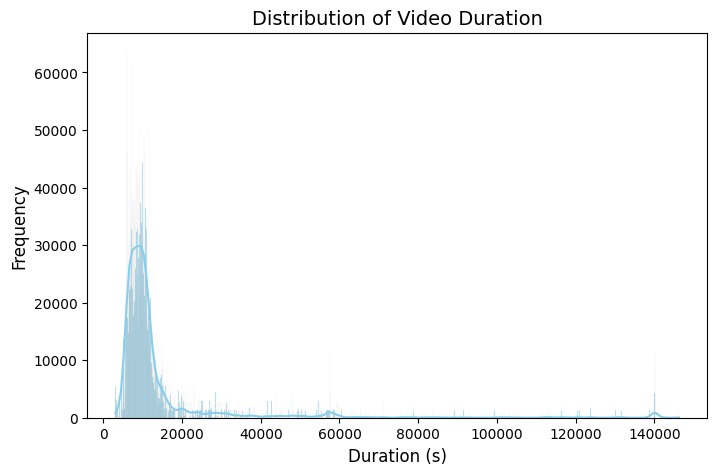

In [6]:
# Filter out extreme values
video_durations = small_matrix[small_matrix['video_duration'] < 150000]

# Distribution of video durations
plt.figure(figsize=(8, 5))
sns.histplot(video_durations['video_duration'], kde=True, color='skyblue')
plt.title('Distribution of Video Duration', fontsize=14)
plt.xlabel('Duration (s)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

### Play Duration vs Video Duration

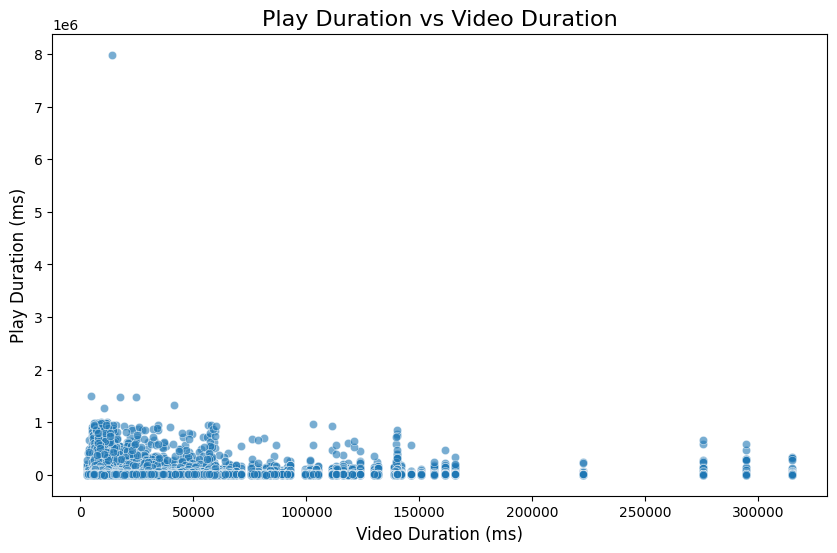

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='video_duration', y='play_duration', data=small_matrix, alpha=0.6)
plt.title('Play Duration vs Video Duration', fontsize=16)
plt.xlabel('Video Duration (ms)', fontsize=12)
plt.ylabel('Play Duration (ms)', fontsize=12)
plt.show()